In [1]:
# import os
# os.environ['KAGGLE_CONFIG_DIR']='/content'
# ! kaggle datasets download -d kratosishere/recog2

 98% 729M/748M [00:04<00:00, 182MB/s]
100% 748M/748M [00:04<00:00, 190MB/s]


In [2]:
# !unzip recog2.zip

Archive:  recog2.zip
  inflating: Train_Cells_masks/train (1).jpg  
  inflating: Train_Cells_masks/train (10).jpg  
  inflating: Train_Cells_masks/train (100).jpg  
  inflating: Train_Cells_masks/train (1000).jpg  
  inflating: Train_Cells_masks/train (101).jpg  
  inflating: Train_Cells_masks/train (102).jpg  
  inflating: Train_Cells_masks/train (103).jpg  
  inflating: Train_Cells_masks/train (104).jpg  
  inflating: Train_Cells_masks/train (105).jpg  
  inflating: Train_Cells_masks/train (106).jpg  
  inflating: Train_Cells_masks/train (107).jpg  
  inflating: Train_Cells_masks/train (108).jpg  
  inflating: Train_Cells_masks/train (109).jpg  
  inflating: Train_Cells_masks/train (11).jpg  
  inflating: Train_Cells_masks/train (110).jpg  
  inflating: Train_Cells_masks/train (111).jpg  
  inflating: Train_Cells_masks/train (112).jpg  
  inflating: Train_Cells_masks/train (113).jpg  
  inflating: Train_Cells_masks/train (114).jpg  
  inflating: Train_Cells_masks/train (115).jpg  
  

In [2]:
# !nvidia-smi

Thu Apr 21 18:18:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'20095110_acad2021222 (1).pdf'
 20095110_acad2021222.pdf
'20095110_courses (1).pdf'
'20095110_ece (1).pdf'
 20095110.rar
'20095110_Shubham Kumar.pdf'
 20095110.zip
 2.pdf
 3.pdf
 ans.pdf
 Assignment3.ipynb
'bandit p.txt'
 bandit.txt
'BHU ece SEM1'
'certificate (1).pdf'
 certificate.pdf
 Classroom
 coding
'Colab Notebooks'
'courses &resources .gdoc'
'cy mid sem 20095110.pdf'
'DSA (Self Paced)'
 EC272_lab06-EC08.pdf
'EC272lab4_EC08 (1).pdf'
 EC272lab4_EC08.pdf
 EC272_lab5_EC-08.pdf
'ECE Core '
 ECE-Y20-IIISem-Onwards
 EO202.pdf
'Ex-3_(20095110)(shubham kumar).pdf'
'Ex-4_(20095110)(Shubham kumar).pdf'
 FACCHA
'fee remission (20095110).pdf'
'fee remission_compressed.pdf'
 H105_Video_lectures
 Harsh
 IIT-App
'IIT-App (1)'
'Introduction to Chemistry - CY101'
'Lab 6 20095110 shubham kumar.gdoc'
'M

In [1]:
from simple_unet_model import simple_unet_model   
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [15]:
image_directory = './train'
mask_directory = './Train_Cells_masks'

In [16]:
SIZE = 512
image_dataset = []  
mask_dataset = [] 

In [17]:
# import pandas as pd
# df = pd.read_csv('sample_submission_.csv')

In [18]:
# df.shape

In [19]:
# images = os.listdir(image_directory)
# for i, image_name in enumerate(images):   
#     if (image_name.split('.')[1] == 'jpg'):
#         image = cv2.imread(image_directory+image_name, 0)
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         image_dataset.append(np.array(image))

In [20]:
for itr in os.listdir(image_directory):
    img = (cv2.imread(os.path.join(image_directory , itr) , cv2.IMREAD_GRAYSCALE))
    img_pil = Image.fromarray(img)
    img = np.array(img_pil.resize((SIZE, SIZE), Image.ANTIALIAS))
    image_dataset.append(img)

In [21]:
image_dataset[0].shape

(512, 512)

In [22]:
for itr in os.listdir(mask_directory):
    img = (cv2.imread(os.path.join(mask_directory , itr) , cv2.IMREAD_GRAYSCALE))
    img_pil = Image.fromarray(img)
    img = np.array(img_pil.resize((SIZE, SIZE), Image.ANTIALIAS))
    mask_dataset.append(img)

In [23]:
mask_dataset[0].shape

(512, 512)

In [24]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [25]:
mask_dataset.shape

(1000, 512, 512, 1)

In [26]:
image_dataset.shape

(1000, 512, 512, 1)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

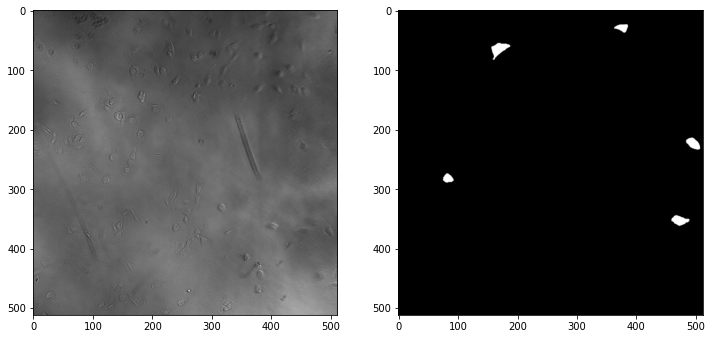

In [28]:
import random
import numpy as np
image_number = random.randint(0, len(x_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(x_train[image_number], (512, 512)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (512, 512)), cmap='gray')
plt.show()

In [29]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [31]:
model = get_model()



history = model.fit(x_train, y_train, 
                    batch_size = 4, 
                    verbose=1, 
                    epochs=1, 
                    validation_data=(x_test, y_test), 
                    shuffle=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 512, 512, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

 spose)                         )                                                                 
                                                                                                  
 concatenate_6 (Concatenate)    (None, 256, 256, 64  0           ['conv2d_transpose_6[0][0]',     
                                )                                 'conv2d_22[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)             (None, 256, 256, 32  18464       ['concatenate_6[0][0]']          
                                )                                                                 
                                                                                                  
 dropout_16 (Dropout)           (None, 256, 256, 32  0           ['conv2d_33[0][0]']              
                                )                                                                 
          

MemoryError: Unable to allocate 900. MiB for an array with shape (900, 512, 512, 1) and data type float32

In [ ]:
model.save('mitochondria_test.hdf5')